In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
from Evaluator import WRMSSEEvaluator
from Dashboard import create_dashboard

## The notebook is for evaluation on the validation set(d_1886 - d_1913) and displaying the dashboard

In [1]:
train_path = '../sales_train_validation.csv'
calendar_path = '../calendar.csv'
prices_path = '../sell_prices.csv'

### Get Weights for the validation fold(d_1886 - d_1913)

In [5]:
%%time

train_df = pd.read_csv(train_path)
calendar = pd.read_csv(calendar_path)
prices = pd.read_csv(prices_path)

train_fold_df = train_df.iloc[:, :-28]
valid_fold_df = train_df.iloc[:, -28:].copy()

evaluator = WRMSSEEvaluator(train_fold_df, valid_fold_df, calendar, prices)
del train_fold_df, train_df, calendar, prices


CPU times: user 47.6 s, sys: 9.57 s, total: 57.2 s
Wall time: 1min


In [6]:
evaluator.weights

,Weight,Level_id
all,1.000000,1.0
CA,0.433750,2.0
TX,0.279369,2.0
WI,0.286881,2.0
CA_1,0.109100,3.0
...,...,...
HOUSEHOLD_2_516--TX_2,0.000016,12.0
HOUSEHOLD_2_516--TX_3,0.000008,12.0
HOUSEHOLD_2_516--WI_1,0.000003,12.0
HOUSEHOLD_2_516--WI_2,0.000002,12.0


### Given prediction for d_1886 to d_1913 and calculate the WRMSSE score

In [ ]:
valid_fold_df.shape
valid_preds = pd.read_csv('../submission.csv')

In [18]:
# Suppose given all zero predictions
#valid_preds = np.zeros(shape = valid_fold_df.shape)
print("The WRMSSE score is {}".format(evaluator.score(valid_preds.iloc[:,1:])))

The WRMSSE score is 2.610390480873784


### Creating dashboard for different level performance

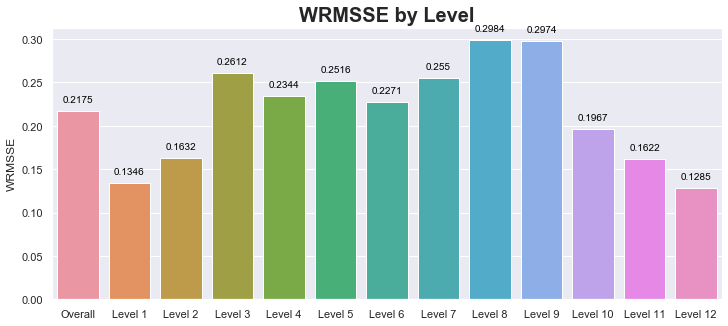

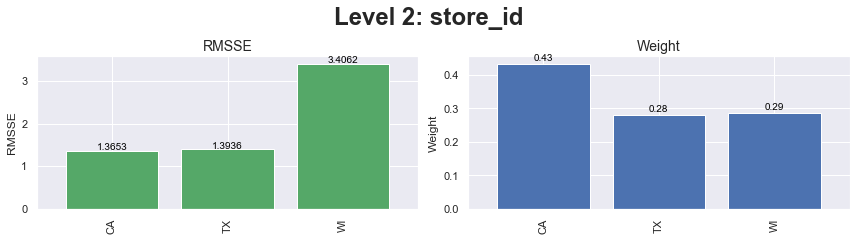

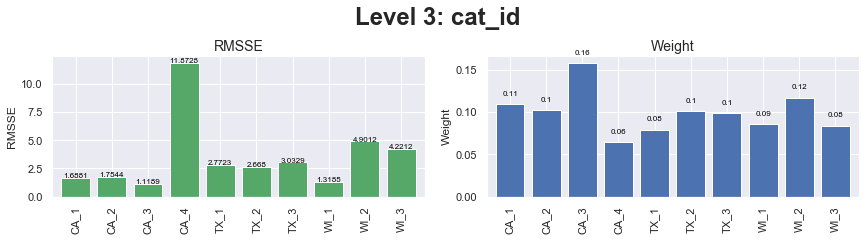

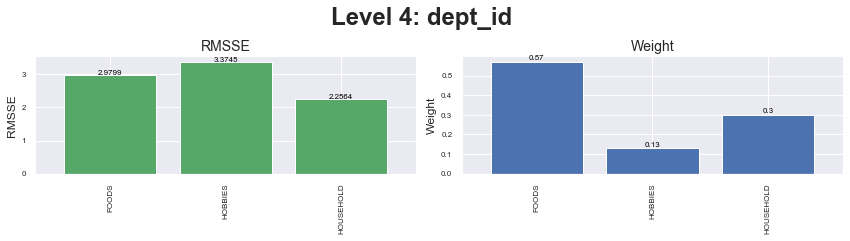

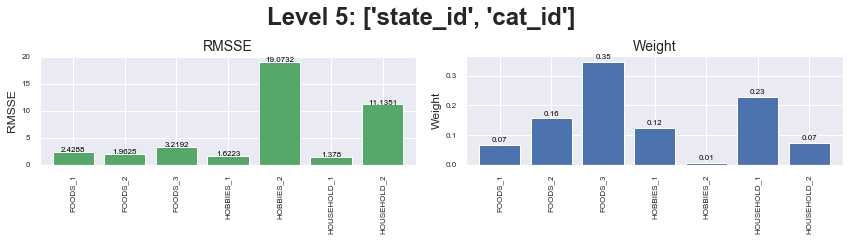

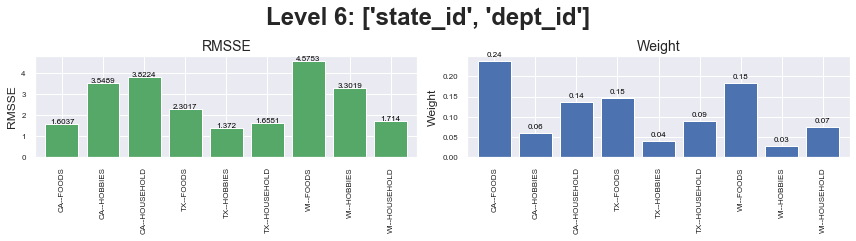

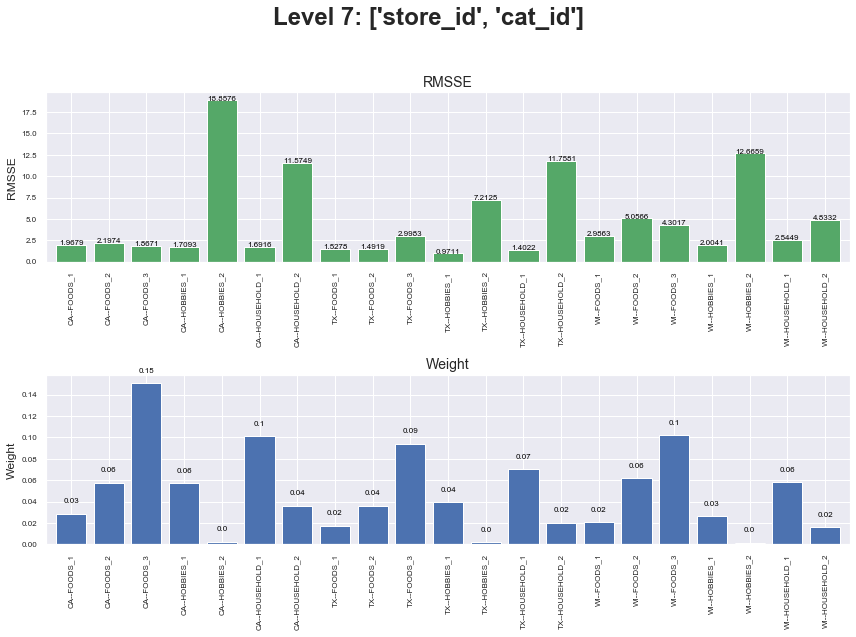

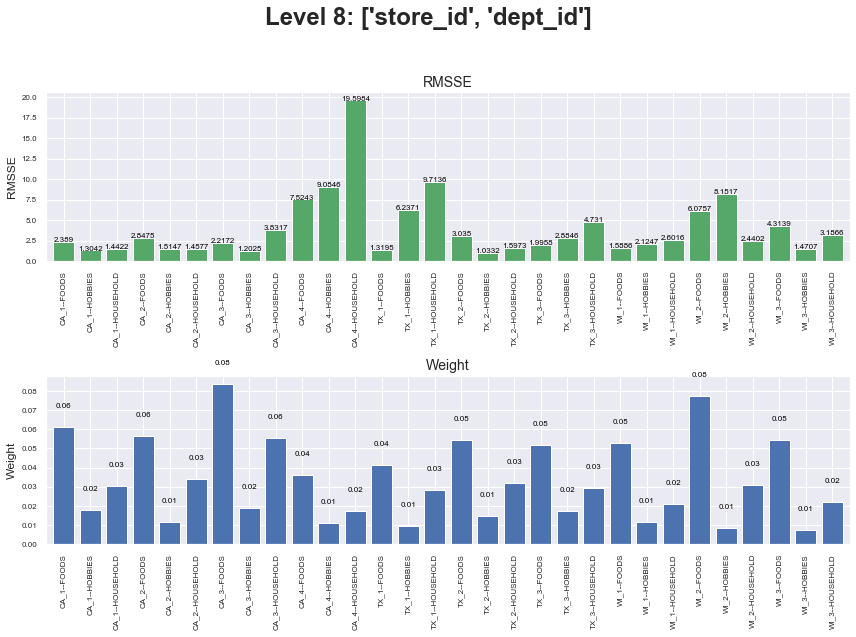

In [19]:
create_dashboard(evaluator)